In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [14]:
df_d = pd.read_excel(os.path.join('Comed_All.xlsx'))
del df_d['Year']
del df_d['Month']
del df_d['Day']
del df_d['Day_of_Week']
del df_d['Weekend']
del df_d['Datetime']

df_d.head()

,MW,Utility,Temp(f)
0,10419,COMED,32.0
1,9940,COMED,32.0
2,9604,COMED,35.6
3,9318,COMED,37.4
4,9224,COMED,37.4


In [15]:
df_2016pos = df_d[df_d['Temp(f)'] >= 60].copy()
df_2016neg = df_d[df_d['Temp(f)'] < 60].copy()

In [16]:
droplist = df_2016pos[(df_2016pos['Temp(f)'] < 67) & (df_2016pos['Temp(f)'] > 65) & (df_2016pos.MW > 14150)].index
df_2016pos.drop(droplist,inplace = True)

In [17]:
X = df_2016pos["Temp(f)"].values.reshape(-1, 1)
y = df_2016pos["MW"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (10332, 1) (10332, 1)


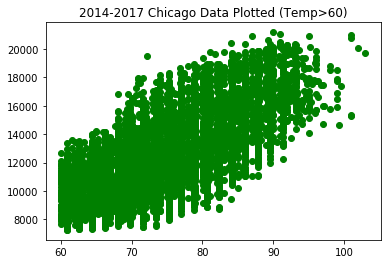

In [18]:
plt.scatter(X, y,color='g')
plt.title("2014-2017 Chicago Data Plotted (Temp>60)")
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

In [24]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.47381474648425903
Testing Score: 0.49997594295067177


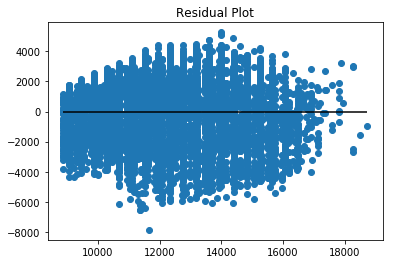

In [25]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")
plt.show()

Text(0.5, 1.0, 'Residual Plot With Trained and Test Data')

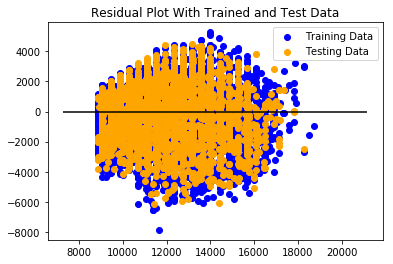

In [26]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot With Trained and Test Data")

In [27]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[229.78429977]]
y-axis intercept:  [-4927.22777032]


In [28]:
y_min_actual = y.min()
y_max_actual = y.max()
x_min = X.min()
x_max = X.max()
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")
y_min =  -4929.39529989+ 229.9277851 * x_min
y_max = -4929.39529989+ 229.9277851 * x_max

Actual Min Value: 7263
Predicted Min Value: [[8862.12805915]]
Actual Max Value: 21175
Predicted Max Value: [[18738.25726346]]


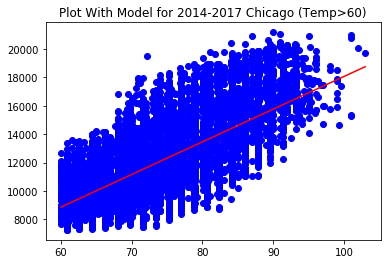

In [29]:
plt.scatter(X, y, c='blue')
plt.title("Plot With Model for 2014-2017 Chicago (Temp>60)")
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [30]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [9036]
Predicted output: [10284.49287476]
Prediction Error: [1248.49287476]


In [31]:
modeldf = pd.DataFrame()
for x in range(len(predictions)):
   modeldf = modeldf.append({"Predicted": predictions[x][0], "Actual": y[x][0], "Error": predictions[x][0] - y[x][0]},ignore_index = True)

In [32]:
for x in range(len(df_2016pos)):
   modeldf.loc[modeldf.Actual == df_2016pos.iloc[x].MW,'Temp'] =df_2016pos.iloc[x]['Temp(f)']

In [33]:
modeldf

,Actual,Error,Predicted,Temp
0,9036.0,1248.492875,10284.492875,73.40
1,8550.0,1734.492875,10284.492875,62.60
2,8242.0,2456.104614,10698.104614,68.00
3,8059.0,2639.104614,10698.104614,68.00
4,7980.0,2718.104614,10698.104614,64.40
5,8214.0,2484.104614,10698.104614,60.80
6,8835.0,1035.881135,9870.881135,64.40
7,9849.0,21.881135,9870.881135,71.60
8,10379.0,-508.118865,9870.881135,63.00
9,10728.0,-1270.730604,9457.269396,60.80


In [34]:
X = df_2016neg["Temp(f)"].values.reshape(-1, 1)
y = df_2016neg["MW"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (9783, 1) (9783, 1)


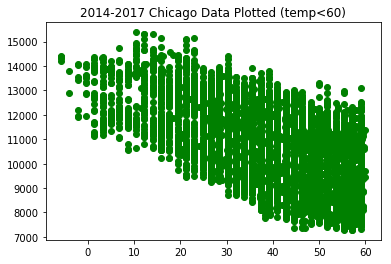

In [35]:
plt.scatter(X, y,color='g')
plt.title("2014-2017 Chicago Data Plotted (temp<60)")
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

In [37]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.28976913560854656
Testing Score: 0.27884734849192194


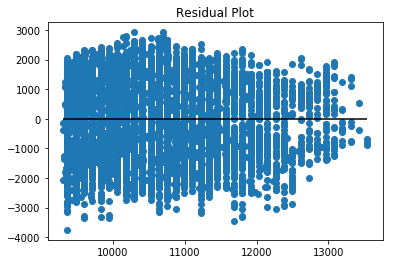

In [38]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")
plt.show()

Text(0.5, 1.0, 'Residual Plot With Trained and Test Data')

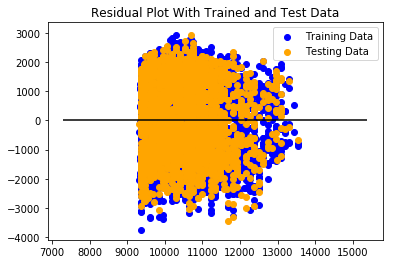

In [39]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot With Trained and Test Data")

In [40]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-64.43548017]]
y-axis intercept:  [13168.1093492]


In [41]:
y_min_actual = y.min()
y_max_actual = y.max()
x_min = X.min()
x_max = X.max()
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")
y_min =  13168.1093492+ (-64.43548017 * x_min)
y_max = 13168.1093492+ (-64.43548017 * x_max)

Actual Min Value: 7286
Predicted Min Value: [[13541.83513419]]
Actual Max Value: 15385
Predicted Max Value: [[9303.91360337]]


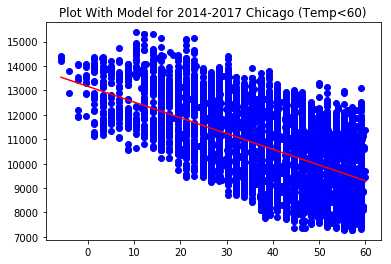

In [42]:
plt.scatter(X, y, c='blue')
plt.title("Plot With Model for 2014-2017 Chicago (Temp<60)")
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [43]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [10419]
Predicted output: [11106.17398374]
Prediction Error: [687.17398374]


In [44]:
modeldf = pd.DataFrame()
for x in range(len(predictions)):
   modeldf = modeldf.append({"Predicted": predictions[x][0], "Actual": y[x][0], "Error": predictions[x][0] - y[x][0]},ignore_index = True)

In [45]:
for x in range(len(df_2016neg)):
   modeldf.loc[modeldf.Actual == df_2016neg.iloc[x].MW,'Temp'] =df_2016neg.iloc[x]['Temp(f)']

In [ ]:
modeldf